<a href="https://colab.research.google.com/github/PochampallyVarshitha/ADM_Project/blob/main/ADM_Project_MHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("mental_health.csv")
df.drop_duplicates(inplace=True)
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]
def clean_gender(g):
    g = str(g).lower()
    if 'female' in g:
        return 'female'
    elif 'male' in g:
        return 'male'
    else:
        return 'other'
df['Gender'] = df['Gender'].apply(clean_gender)
columns_to_fill = ['self_employed', 'work_interfere', 'benefits', 'care_options',
                   'wellness_program', 'seek_help', 'anonymity', 'leave',
                   'mental_health_consequence', 'phys_health_consequence', 'coworkers',
                   'supervisor', 'mental_health_interview', 'phys_health_interview',
                   'mental_vs_physical', 'obs_consequence']
for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mode()[0])
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


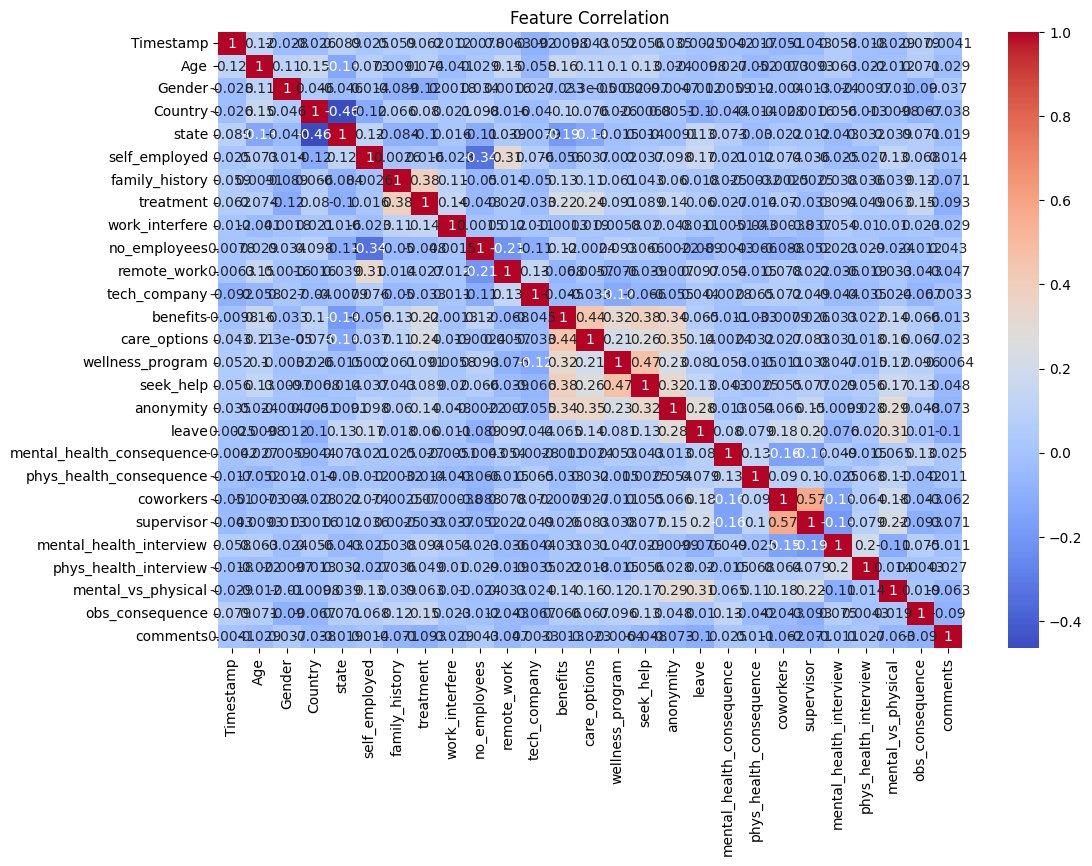

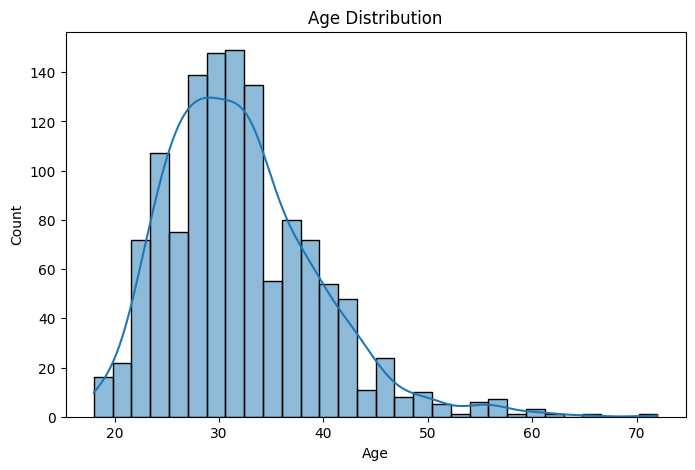

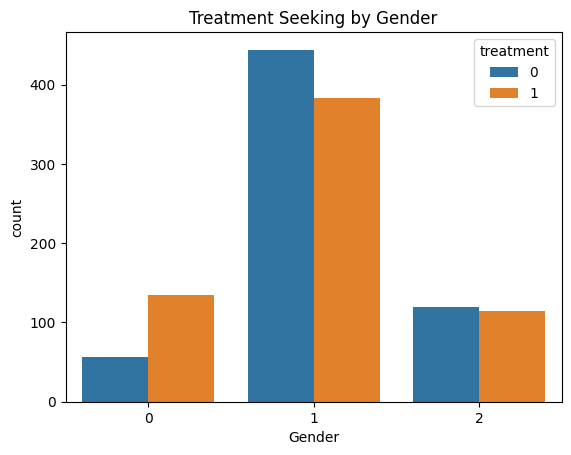

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()
sns.countplot(data=df, x='Gender', hue='treatment')
plt.title("Treatment Seeking by Gender")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = df.drop('treatment', axis=1)
y = df['treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [5]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7051792828685259

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.74      0.69       113
           1       0.76      0.67      0.72       138

    accuracy                           0.71       251
   macro avg       0.71      0.71      0.70       251
weighted avg       0.71      0.71      0.71       251

